In [21]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import  mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [17]:
from sklearn.datasets import load_digits,load_boston,load_iris

In [19]:
data = load_iris()
features=data.data
label=data.target
features

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [81]:
train_feature,test_feature,train_label,test_label=train_test_split(features,label,test_size=0.3)

In [82]:
rfc=RandomForestClassifier()
rfc.fit(train_feature,train_label)
predict_label=rfc.predict(test_feature)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
accuracy_score(test_label,predict_label)

0.97777777777777775

In [88]:
iris=load_iris()
f_list=iris.data
l_list=iris.target

In [89]:
rf=RandomForestClassifier()
params={'n_estimators':range(1,11)}
model=GridSearchCV(estimator=rf,param_grid=params)
model.fit(f_list,l_list)
print('最优分数:',model.best_score_)
print('最优分数:',model.best_params_)

最优分数: 0.966666666667
最优分数: {'n_estimators': 3}


In [92]:
rf=RandomForestClassifier()
params_pip={'randomforestclassifier__n_estimators':range(1,11)}
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('randomforestclassifier',rf)
]
)

In [93]:
model_new=GridSearchCV(estimator=pipeline,param_grid=params_pip)
model_new.fit(f_list,l_list)
print('最优分数:',model_new.best_score_)
print('最优分数:',model_new.best_params_)

最优分数: 0.973333333333
最优分数: {'randomforestclassifier__n_estimators': 9}


In [58]:
ms=MinMaxScaler()
features_ms=ms.fit_transform(features)
x=[]
y=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features_ms)
    x.append(i)
    y.append(kmeans.inertia_)


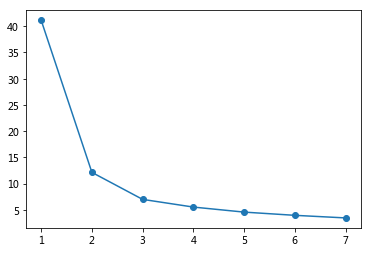

In [64]:
# elbow method
plt.plot(x,y,marker='o')
plt.show() #如图展示,在k>3之后,斜率就基本不变了,因此选最优k=3